In [ ]:
# imports & output folder
import sqlite3, pandas as pd, matplotlib.pyplot as plt, pathlib

DB       = pathlib.Path(r"C:/Users/dell/Desktop/final_mini_project/driving_decisions.db")
OUT_DIR  = pathlib.Path(r"C:/Users/dell/Desktop/final_mini_project/report")
OUT_DIR.mkdir(parents=True, exist_ok=True)

con = sqlite3.connect(DB)
%config InlineBackend.figure_format = 'retina'


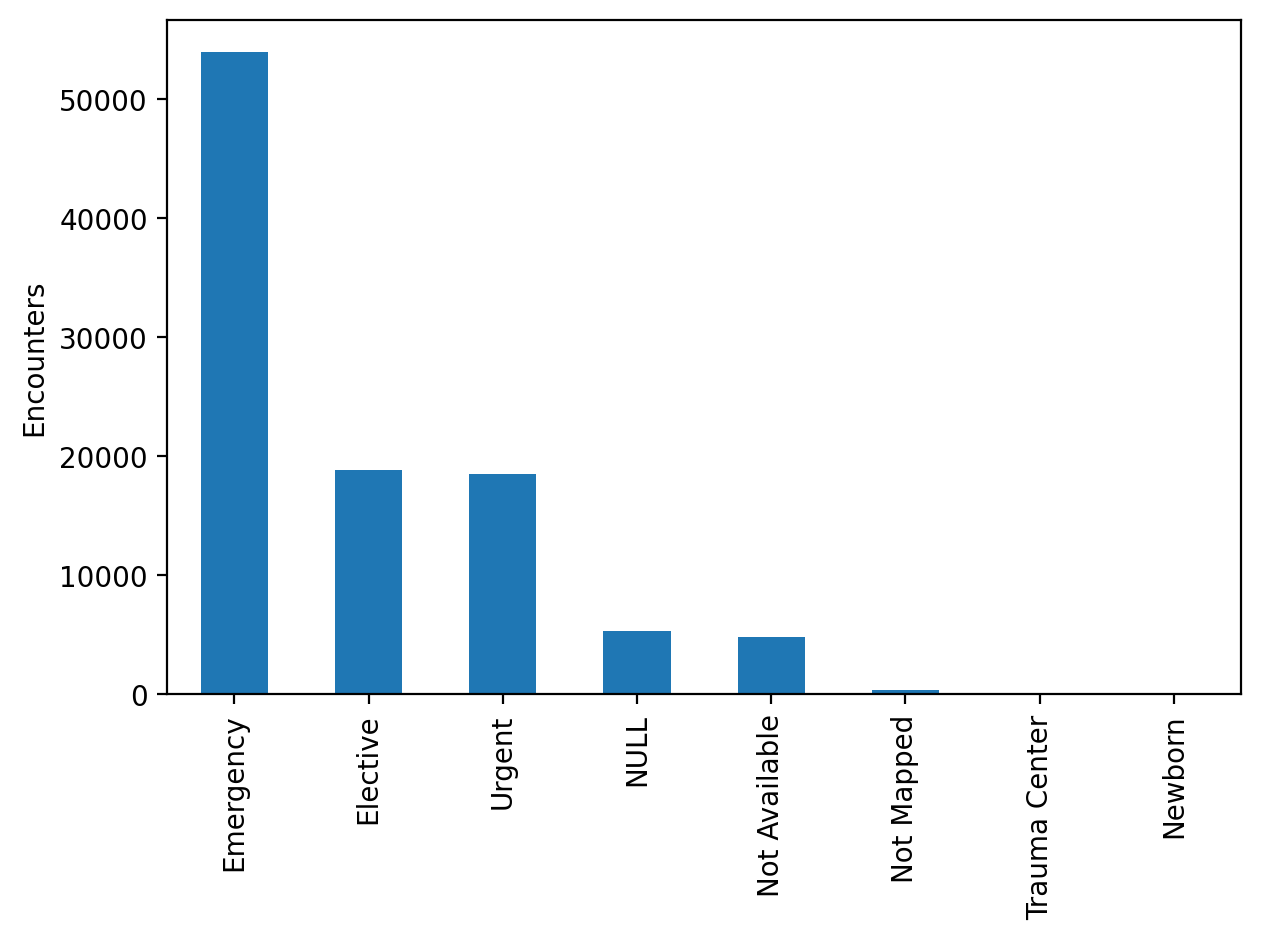

In [ ]:
###Q1   Average LOS by admission type
q1 = """
SELECT at.description  AS admission_type,
       COUNT(*)        AS encounters,
       ROUND(AVG(e.time_in_hospital),1) AS avg_los
FROM   Encounters e
JOIN   AdmissionType at USING (admission_type_id)
GROUP  BY at.description
ORDER  BY encounters DESC;
"""
df1 = pd.read_sql(q1, con)

ax = df1.plot.bar(x='admission_type', y='encounters', legend=False)
ax.set_ylabel("Encounters"); ax.set_xlabel("")
plt.tight_layout()
plt.savefig(OUT_DIR / "q1_encounters.png", dpi=300)
plt.show()


In [ ]:
###Q2   30‑day readmission rate
q2 = """
SELECT ROUND(100.0 * SUM(readmit_status = '<30') / COUNT(*), 1)
       AS pct_within_30
FROM   Encounters;
"""
df2 = pd.read_sql(q2, con)
display(df2)                      # one‑row table


,pct_within_30
0,11.2


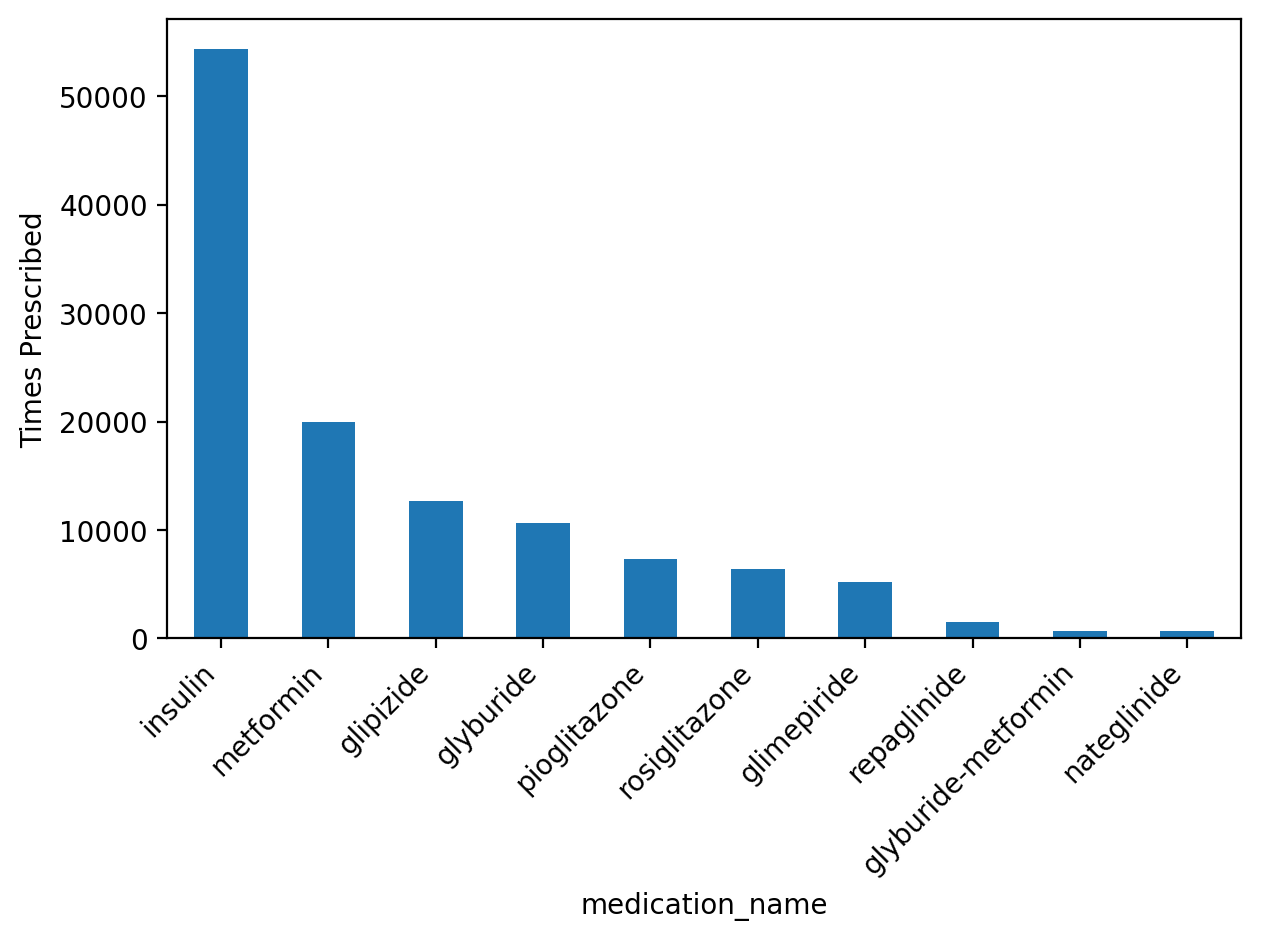

In [ ]:
###Q3   Top 10 medications actually administered
q3 = """
SELECT medication_name,
       COUNT(*) AS times_prescribed
FROM   EncounterMedication
WHERE  dosage_change <> 'No'
GROUP  BY medication_name
ORDER  BY times_prescribed DESC
LIMIT 10;
"""
df3 = pd.read_sql(q3, con)

ax = df3.plot.bar(x='medication_name', y='times_prescribed', legend=False)
ax.set_ylabel("Times Prescribed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(OUT_DIR / "q3_top_meds.png", dpi=300)
plt.show()


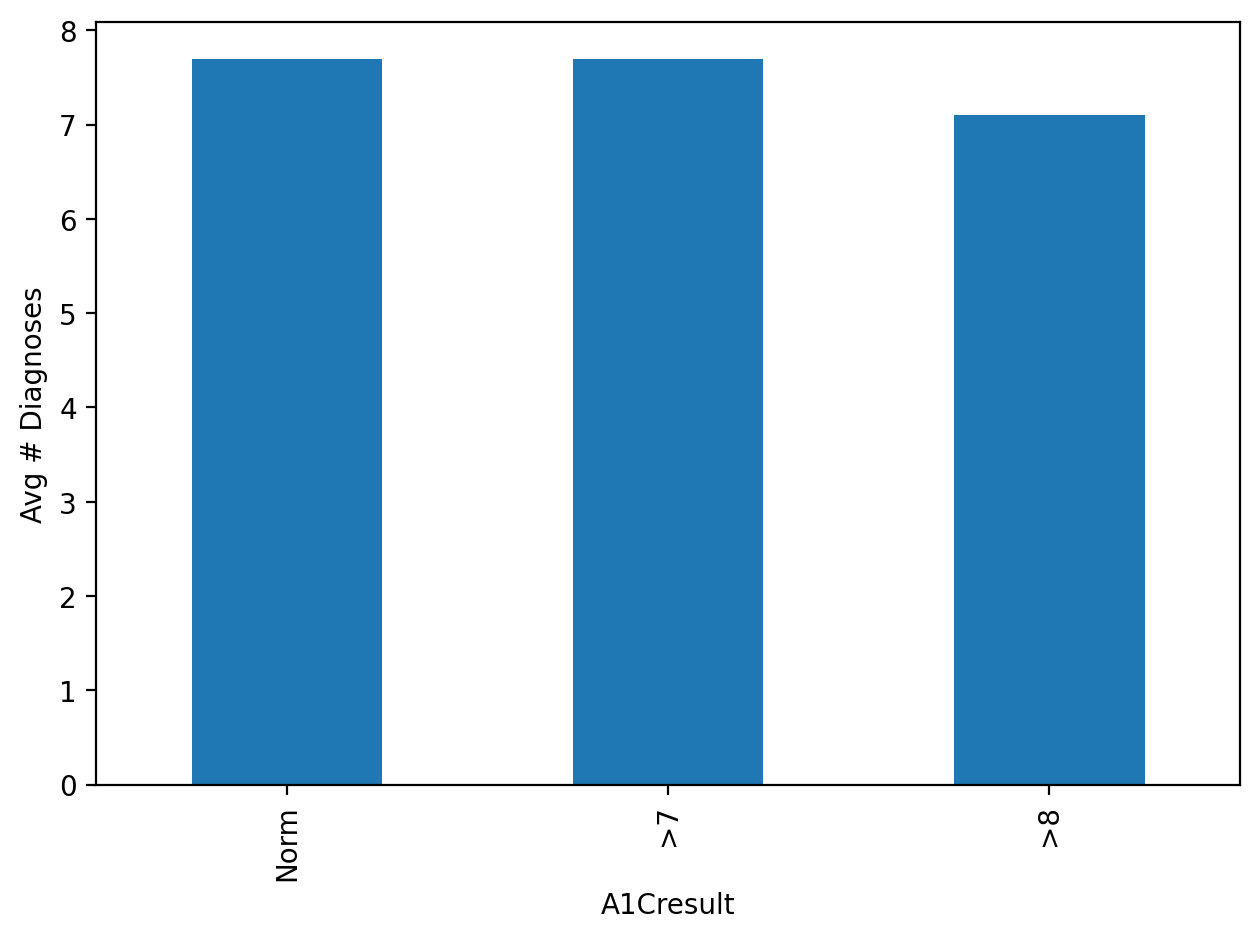

In [ ]:
###Q4   A1C result vs average number of diagnoses
q4 = """
SELECT A1Cresult,
       ROUND(AVG(number_diagnoses),1) AS avg_dx
FROM   Encounters
WHERE  A1Cresult NOT IN ('None','?')
GROUP  BY A1Cresult
ORDER  BY avg_dx DESC;
"""
df4 = pd.read_sql(q4, con)

ax = df4.plot.bar(x='A1Cresult', y='avg_dx', legend=False)
ax.set_ylabel("Avg # Diagnoses")
plt.tight_layout()
plt.savefig(OUT_DIR / "q4_a1c_vs_dx.png", dpi=300)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_33060\1930105665.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


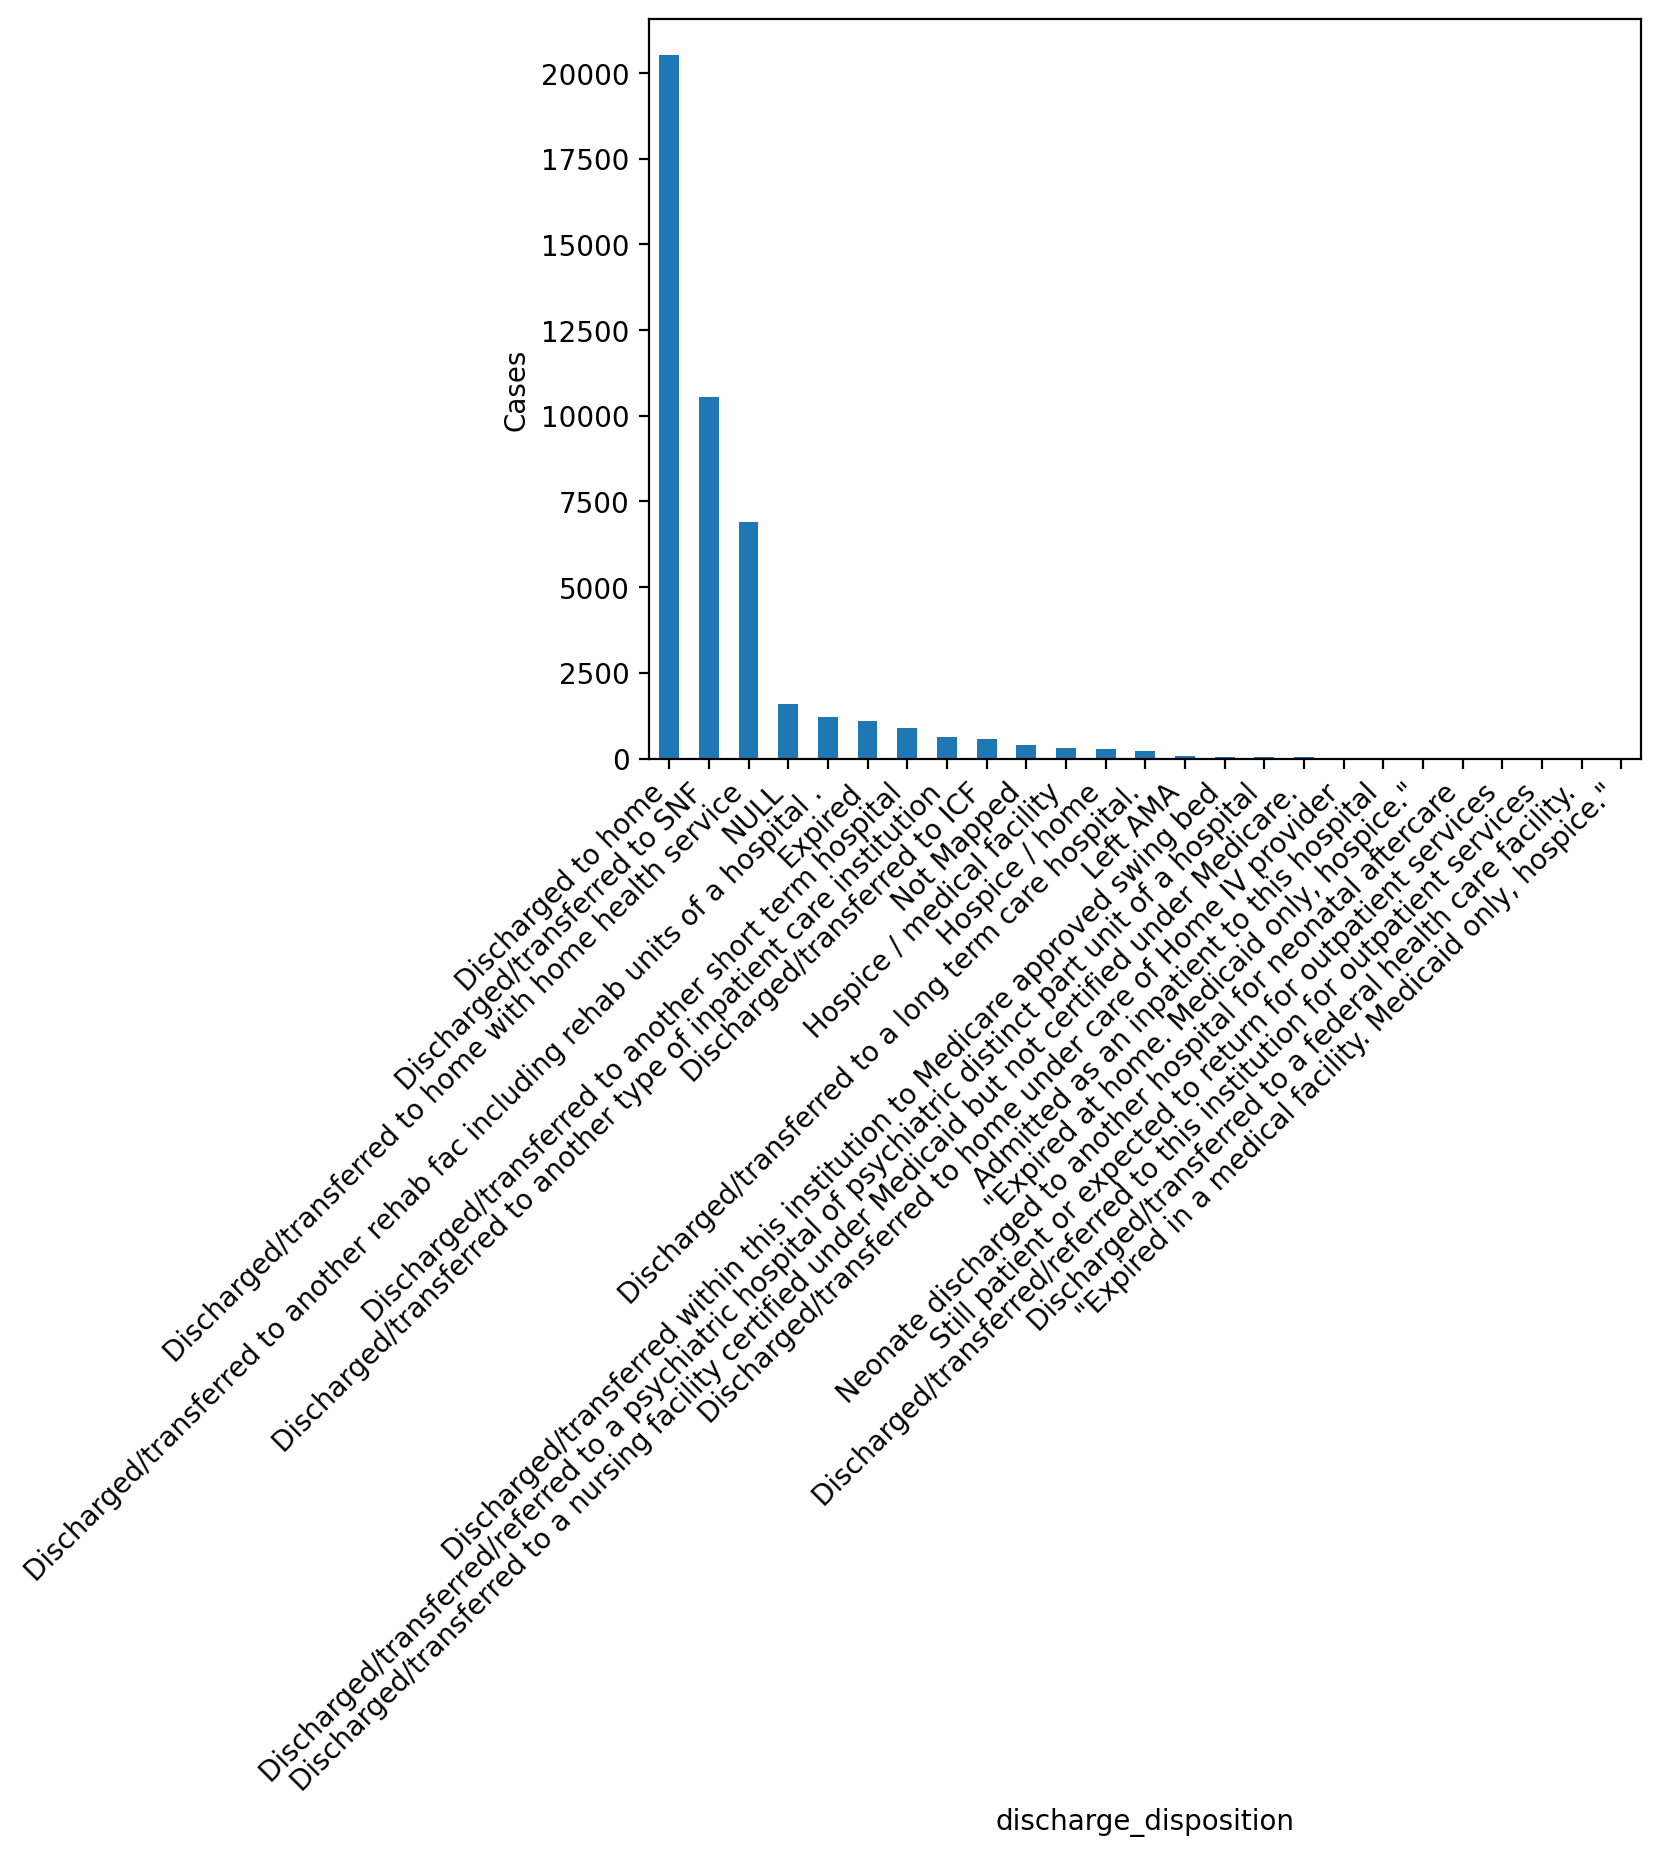

In [ ]:
###Q5   Discharge dispositions for patients aged ≥ 70
q5 = """
SELECT dd.description AS discharge_disposition,
       COUNT(*)       AS n_cases
FROM   Encounters e
JOIN   Patients   p  USING (patient_nbr)
JOIN   DischargeDisposition dd USING (discharge_disposition_id)
WHERE  p.age IN ('[70-80)', '[80-90)', '[90-100)')
GROUP  BY dd.description
ORDER  BY n_cases DESC;
"""
df5 = pd.read_sql(q5, con)

ax = df5.plot.bar(x='discharge_disposition', y='n_cases', legend=False)
ax.set_ylabel("Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(OUT_DIR / "q5_senior_dispositions.png", dpi=300)
plt.show()
